<a href="https://colab.research.google.com/github/Diyaa-lacoul/Ai-Coursework/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split








# Loading dataset

In [2]:
# Loading dataset
df = pd.read_csv('/content/Dengue Data.csv')

#Data set before cleaning
print(df.head)

<bound method NDFrame.head of            Date Date.1  Time  Case  Rainfall  Temperature  Humidity  Wind
0      01-01-20      J     1     3       0.0         21.6      67.5   1.0
1      02-01-20      J     2    17       2.0         21.8      73.5   1.5
2      03-01-20      J     3    20      18.0         19.8      90.5   5.0
3      04-01-20      J     4    39       0.0         20.5      82.0   0.5
4      05-01-20      J     5    45       0.3         19.6      73.5   2.0
..          ...    ...   ...   ...       ...          ...       ...   ...
726  12/27/2021      D   727    31       0.7         20.0      89.5   0.0
727  12/28/2021      D   728    22       0.6         21.5      72.5   0.0
728  12/29/2021      D   729    34       0.0         19.5      89.5   2.0
729  12/30/2021      D   730    42       0.0         20.0      90.5   1.0
730  12/31/2021      D   731    45       0.0         18.0      92.0   1.5

[731 rows x 8 columns]>


# Data Cleaning

In [3]:


# Data cleaning by checking null values
print("\nMissing Values:")
print(df.isnull().sum())






Missing Values:
Date           0
Date.1         0
Time           0
Case           0
Rainfall       0
Temperature    0
Humidity       0
Wind           0
dtype: int64


# Exploring data and visualization

In [4]:
# Exploring data and visualization
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         731 non-null    object 
 1   Date.1       731 non-null    object 
 2   Time         731 non-null    int64  
 3   Case         731 non-null    int64  
 4   Rainfall     731 non-null    float64
 5   Temperature  731 non-null    float64
 6   Humidity     731 non-null    float64
 7   Wind         731 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.8+ KB
None

Summary Statistics:
             Time         Case    Rainfall  Temperature    Humidity  \
count  731.000000   731.000000  731.000000   731.000000  731.000000   
mean   366.000000   274.835841    5.081669    26.940575   73.672367   
std    211.165812   287.512102   12.262097     4.232607   15.068418   
min      1.000000     0.000000    0.000000    15.100000   27.000000   
25%    183.500000 

#Visualize the distribution of cases graph

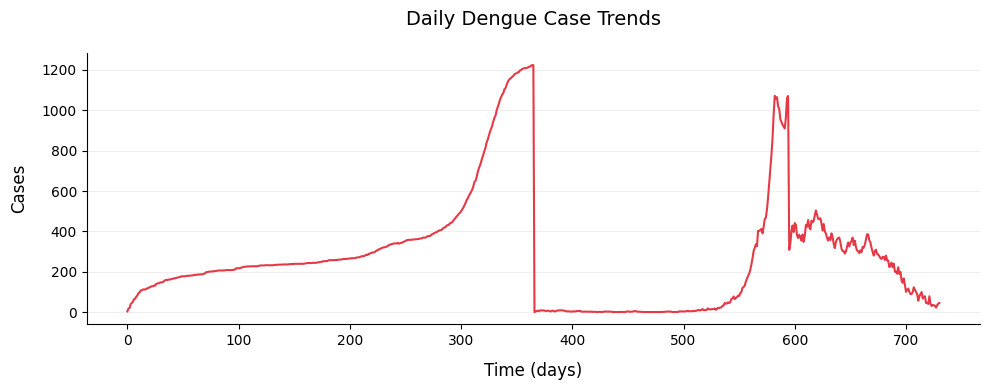

In [5]:
#Visualize the distribution of cases graph
plt.figure(figsize=(10, 4), facecolor='white')  # Clean white background
plt.plot(df['Case'], color='#E63946', linewidth=1.5)  # Modern red color
plt.title('Daily Dengue Case Trends', pad=20, fontsize=14)  # Better spacing
plt.xlabel('Time (days)', fontsize=12, labelpad=10)
plt.ylabel('Cases', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.2)  # Only horizontal gridlines
plt.gca().spines[['top','right']].set_visible(False)  # Remove chart borders
plt.tight_layout()
plt.show()

In [6]:
# Create a binary target variable (1 for outbreak days, 0 for non-outbreak)
# We'll define an outbreak day as when cases are above the 75th percentile
outbreak_threshold = df['Case'].quantile(0.75)
df['Outbreak'] = (df['Case'] > outbreak_threshold).astype(int)

#Data set After cleaning and prepration
print(df.head)



<bound method NDFrame.head of            Date Date.1  Time  Case  Rainfall  Temperature  Humidity  Wind  \
0      01-01-20      J     1     3       0.0         21.6      67.5   1.0   
1      02-01-20      J     2    17       2.0         21.8      73.5   1.5   
2      03-01-20      J     3    20      18.0         19.8      90.5   5.0   
3      04-01-20      J     4    39       0.0         20.5      82.0   0.5   
4      05-01-20      J     5    45       0.3         19.6      73.5   2.0   
..          ...    ...   ...   ...       ...          ...       ...   ...   
726  12/27/2021      D   727    31       0.7         20.0      89.5   0.0   
727  12/28/2021      D   728    22       0.6         21.5      72.5   0.0   
728  12/29/2021      D   729    34       0.0         19.5      89.5   2.0   
729  12/30/2021      D   730    42       0.0         20.0      90.5   1.0   
730  12/31/2021      D   731    45       0.0         18.0      92.0   1.5   

     Outbreak  
0           0  
1           0

# Visualizing the relationship between features and outbreaks

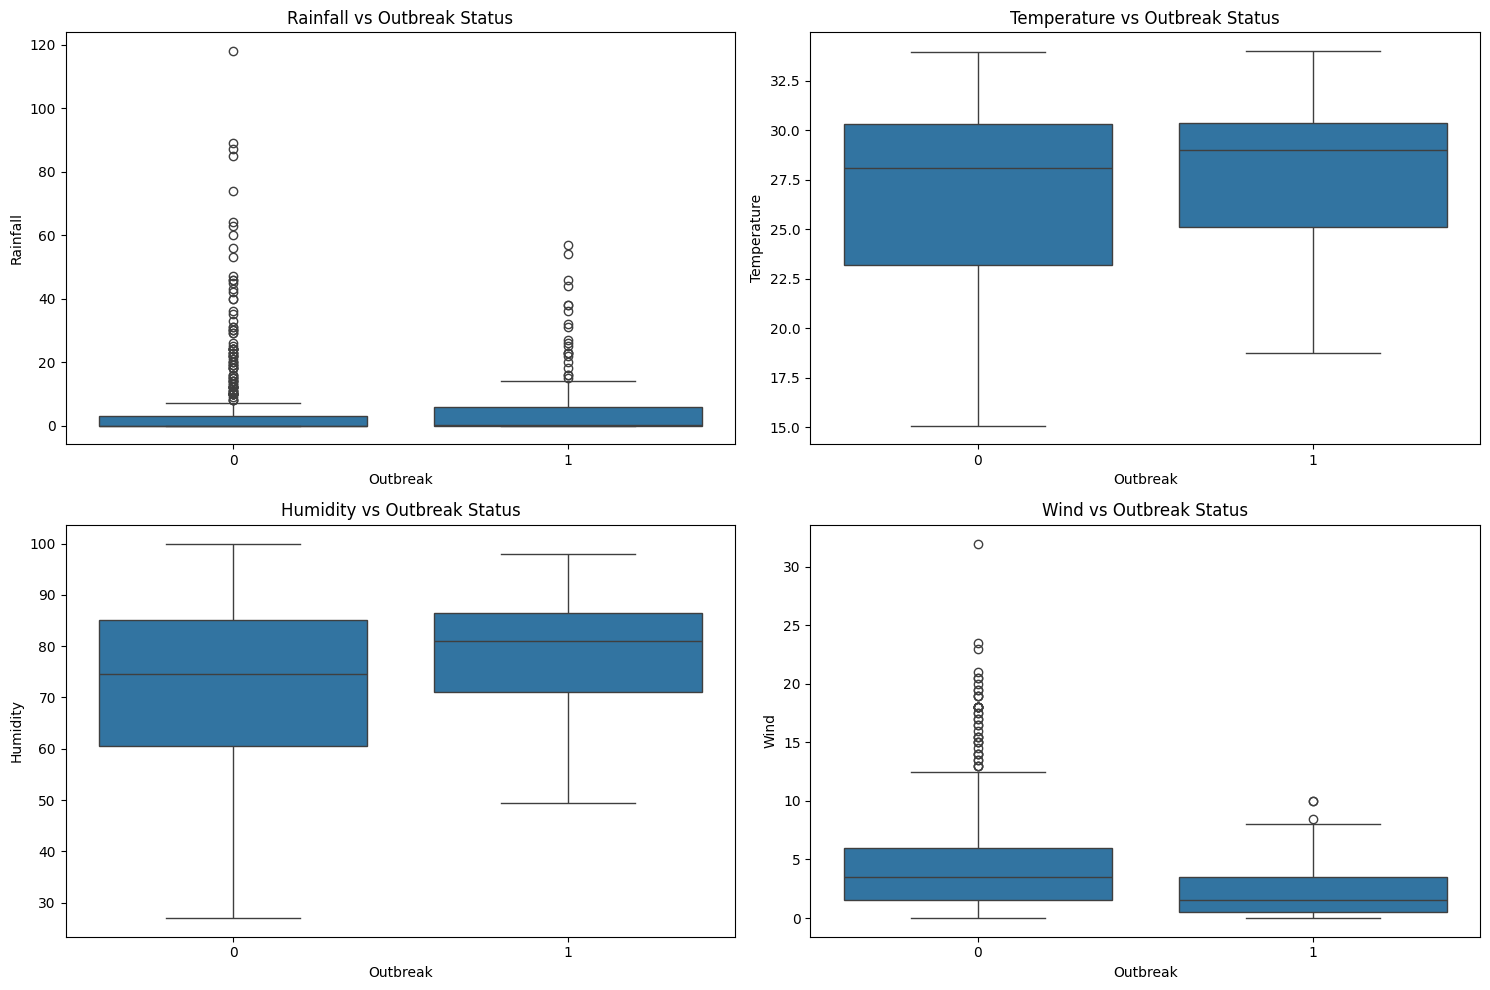

In [7]:
# Visualizing the relationship between features and outbreaks
plt.figure(figsize=(15, 10))
features = ['Rainfall', 'Temperature', 'Humidity', 'Wind']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outbreak', y=feature, data=df)
    plt.title(f'{feature} vs Outbreak Status')
plt.tight_layout()
plt.show()

# Correlation matrix

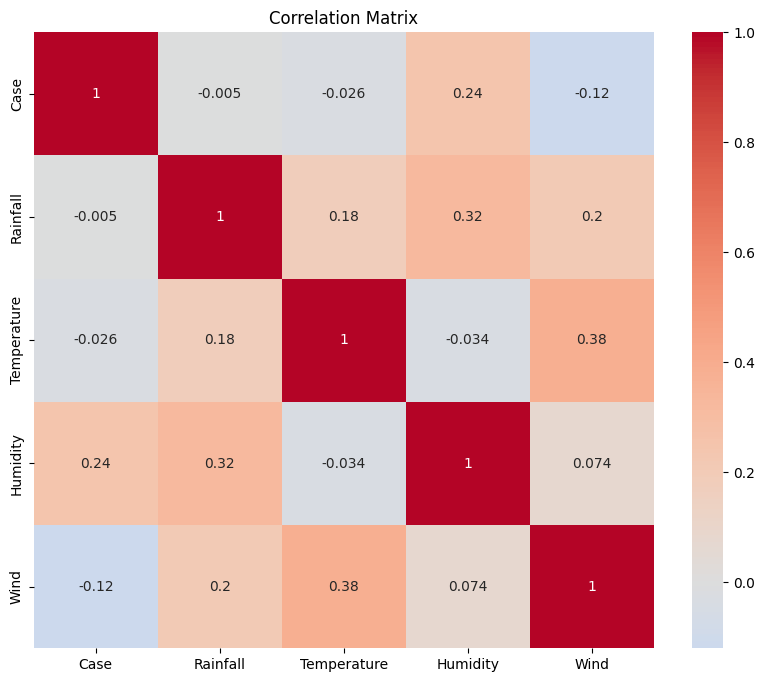

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Case', 'Rainfall', 'Temperature', 'Humidity', 'Wind']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# Preparing data for modeling

In [9]:
# Preparing data for modeling
X = df[['Rainfall', 'Temperature', 'Humidity', 'Wind']]
y = df['Outbreak']


# Spliting the data into training and testing sets

In [10]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Feature standardization





In [11]:
# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model





In [12]:
# Train the Logistic Regression model

print("Training model...", end=" ")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("Done!")

# Verify training
print(f"Trained on {len(X_train)} samples")
print("Model coefficients:", model.coef_)


Training model... Done!
Trained on 511 samples
Model coefficients: [[-0.01531721  0.77146732  0.68326631 -1.23691903]]


# Make predictions

In [13]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation

In [ ]:
# Model Evaluation
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\nIntercept:", model.intercept_[0])



Model Coefficients:
Rainfall: -0.0153
Temperature: 0.7715
Humidity: 0.6833
Wind: -1.2369

Intercept: -1.476425361261643


# Confusion Matrix

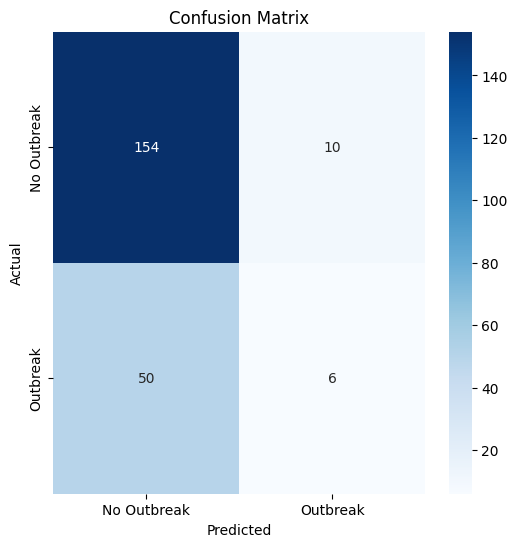

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Outbreak', 'Outbreak'],
            yticklabels=['No Outbreak', 'Outbreak'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Classification Report

In [15]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       164
           1       0.38      0.11      0.17        56

    accuracy                           0.73       220
   macro avg       0.56      0.52      0.50       220
weighted avg       0.66      0.73      0.67       220



# Performance Metrics



In [16]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.7273
Precision: 0.3750
Recall: 0.1071
F1 Score: 0.1667


# Receiver Operating Characteristic (ROC) Curve

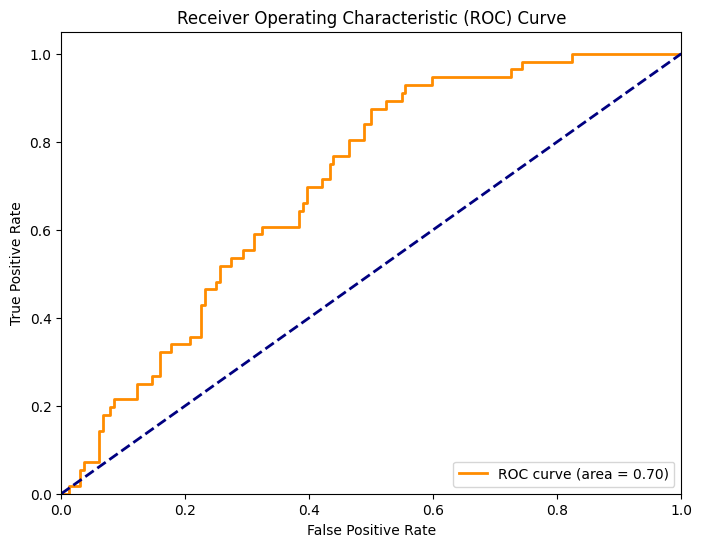

In [17]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Cross-validation



In [18]:
# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")



Cross-Validation Accuracy Scores: [0.7961165  0.73529412 0.80392157 0.7745098  0.7745098 ]
Mean CV Accuracy: 0.7769 (±0.0238)


## Feature Importance


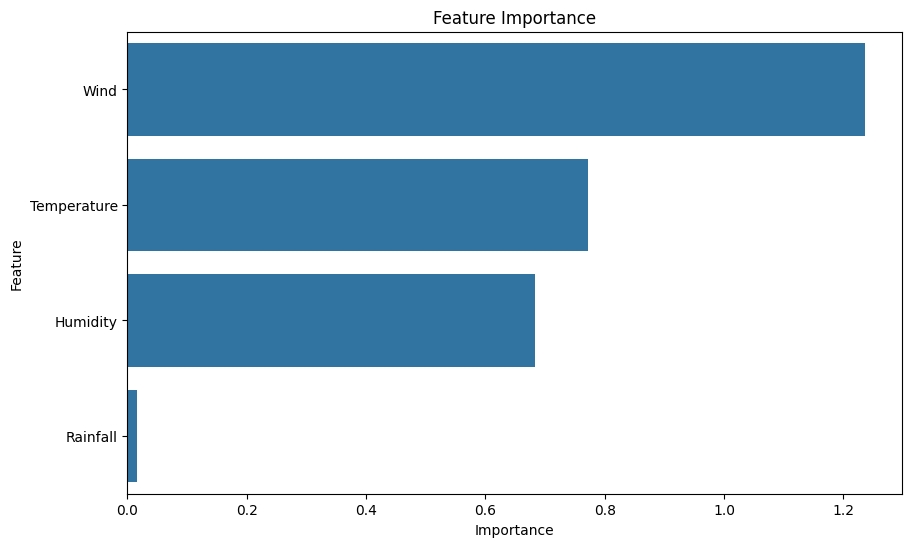

In [19]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

## Cross-Validation Accuracy Across Fold





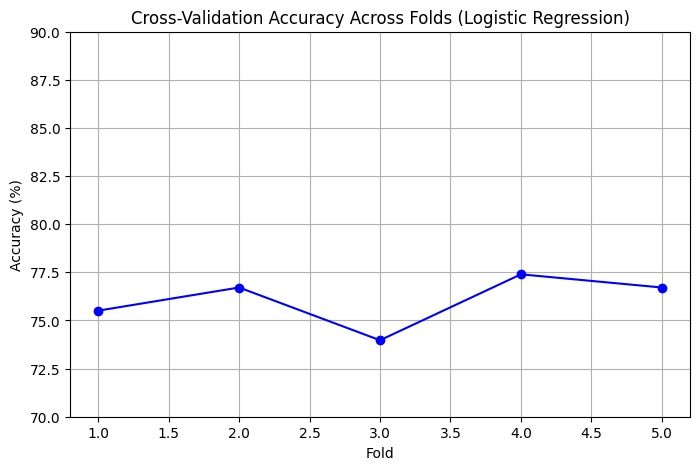

In [20]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Plotting
folds = [1, 2, 3, 4, 5]
plt.figure(figsize=(8, 5))
plt.plot(folds, cv_scores * 100, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Accuracy Across Folds (Logistic Regression)')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 90)
plt.grid(True)
plt.show()


# Logistic Regression Decision Boundary On Dengue Dataset

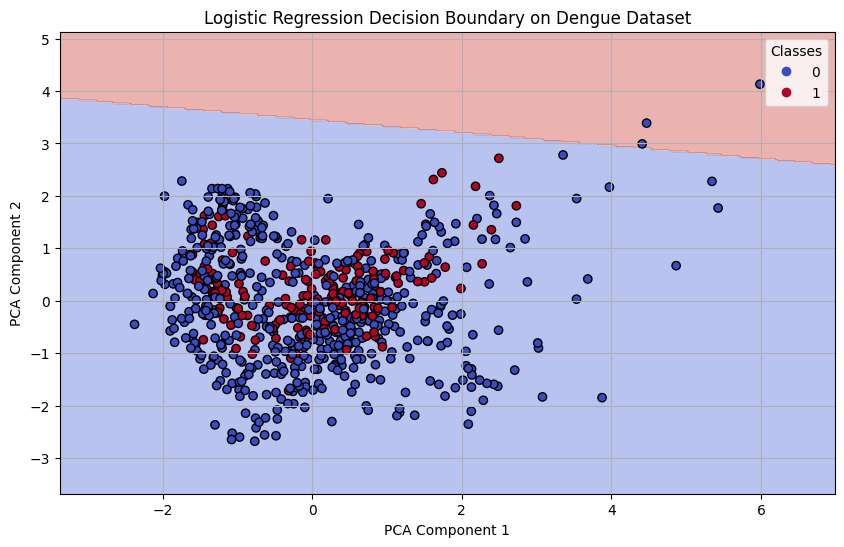

In [21]:
# Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Logistic Regression Decision Boundary on Dengue Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()
